<a href="https://colab.research.google.com/github/Rahul21sai/ML_projects/blob/main/HousePricePredicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies



In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Importing the california house price Data set**


In [103]:
house_price_dataset = fetch_california_housing()

In [104]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [105]:
# loading the dataset to a pandas Dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data , columns = house_price_dataset.feature_names)

In [106]:
#print first 5 rows of our Dataframe
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [107]:
# add the target (price) column to the Dataframe
house_price_dataframe['price'] = house_price_dataset.target

In [108]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [109]:
# checking the no of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

In [110]:
#check for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [111]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


correlation

In [112]:
correlation = house_price_dataframe.corr()

<Axes: >

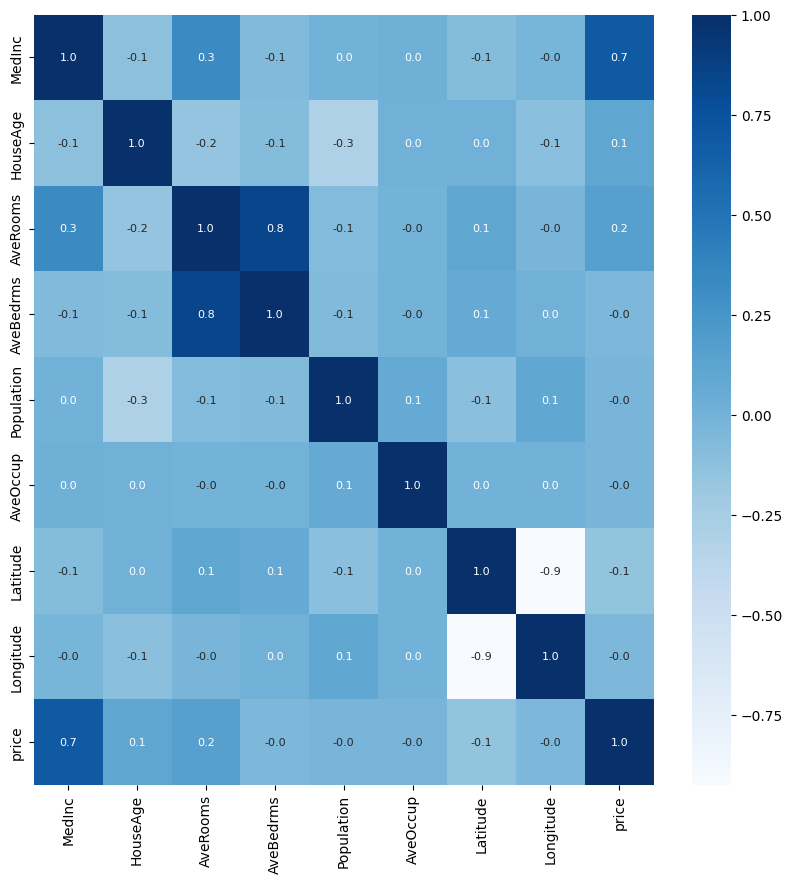

In [113]:
# constructing a heatmap to understand the correaltion
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar= True, fmt='.1f', annot =True , annot_kws={'size': 8}, cmap='Blues')

splitting the data and Target

In [114]:
x = house_price_dataframe.drop(['price'],axis=1)
y = house_price_dataframe['price']

In [115]:
print(x)
print(y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

splitting the data into training and testing data

In [116]:
x_train,x_test, y_train,  y_test = train_test_split(x,y, test_size =0.3, random_state = 2)

In [117]:
print(x.shape,x_train.shape,x_test.shape)

(20640, 8) (14448, 8) (6192, 8)


MOdel training

linear regression

In [118]:
#loading the model
model = LinearRegression()

In [119]:
#training the model with x_train
model.fit(x_train , y_train)

LinearRegression()

Evaluation

Predicition on training data

In [120]:
#Accuracy for predicition on training data
training_data_prediciton = model.predict(x_train)

In [121]:
print(training_data_prediciton)

[2.05457085 1.2617778  1.45814849 ... 1.54458089 1.78470266 1.21999935]


In [122]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediciton)

#mean Absolute error
score_2 = metrics.mean_absolute_error(y_train,training_data_prediciton)

print("R squared error:", score_1)
print('Mean Absolute Error:', score_2)

R squared error: 0.6070888364926216
Mean Absolute Error: 0.5289506660703606


Visualizing the actual prices and predicted prices

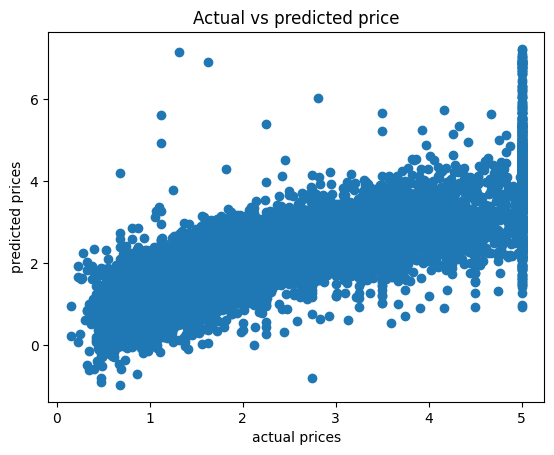

In [123]:
plt.scatter(y_train , training_data_prediciton)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("Actual vs predicted price")
plt.show()

predicition on Test data

In [124]:
#Accuracy for predicition on test data
test_data_prediciton = model.predict(x_test)

In [125]:
print(test_data_prediciton)

[2.81219561 1.26208993 1.43568493 ... 1.82811758 2.35080185 2.49388055]


In [126]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediciton)

#mean Absolute error
score_2 = metrics.mean_absolute_error(y_test,test_data_prediciton)

print("R squared error:", score_1)
print('Mean Absolute Error:', score_2)

R squared error: 0.601550789161043
Mean Absolute Error: 0.5362588391493077


scatter plot for testing

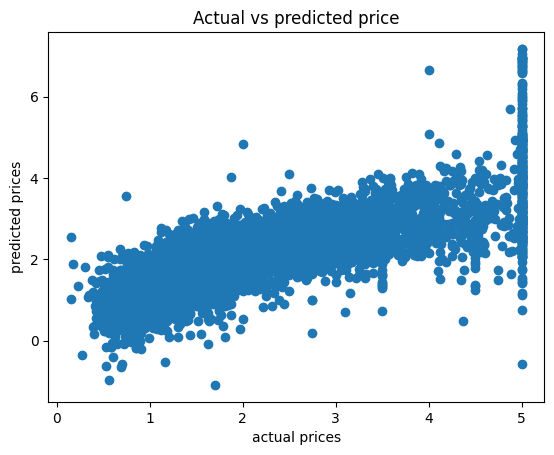

In [127]:
plt.scatter(y_test , test_data_prediciton)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("Actual vs predicted price")
plt.show()